In [11]:
# importing libraries that I'll need
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [12]:
# loading the dataset
df = pd.read_csv("IRIS.csv")

In [13]:
# just checking how the data looks in the beginning
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


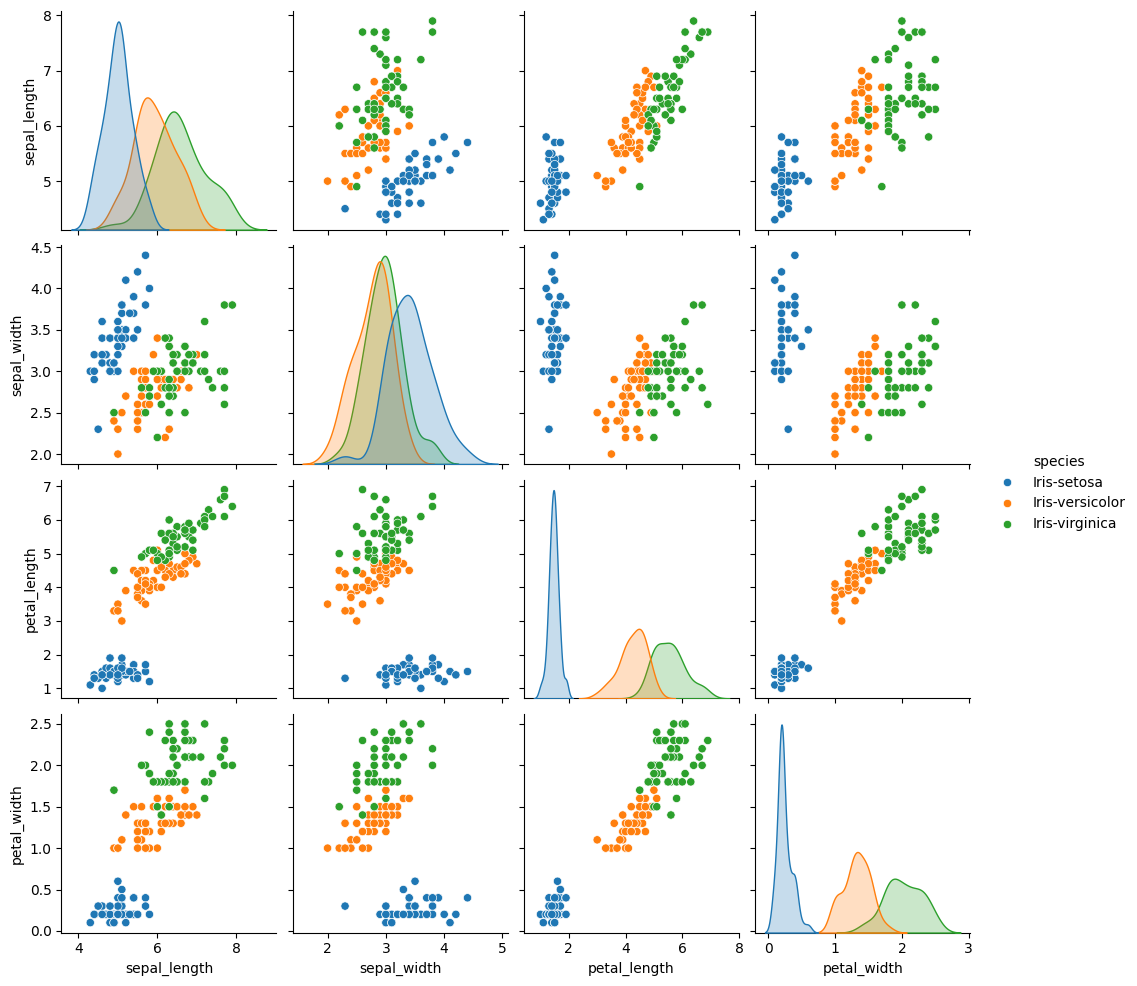

In [14]:

# visualizing the data to see if different species look different in plots
sns.pairplot(df, hue='species')
plt.show()

In [15]:

# converting species names (setosa, etc.) into numbers
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # like: setosa = 0, versicolor = 1, virginica = 2

In [16]:
# separating input features and the target label
X = df.drop("species", axis=1)  # all columns except 'species'
y = df["species"]               # this is what we want to predict

In [17]:
# splitting the dataset into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:

# using a Random Forest classifier (works well for beginners and gives good results)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # training the model with our training data

RandomForestClassifier(random_state=42)

In [19]:
# now let's test how our model is doing
y_pred = model.predict(X_test)

In [20]:
# checking the accuracy and detailed report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



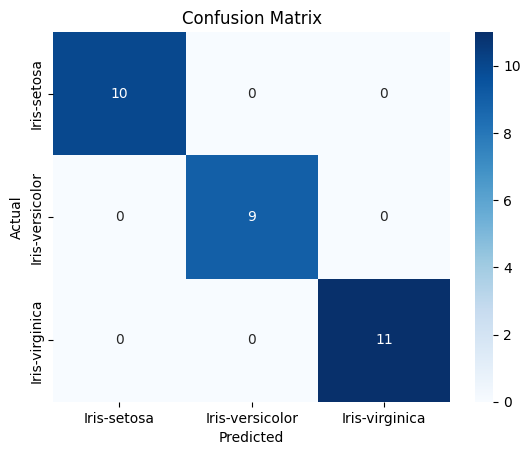

In [21]:
# creating a confusion matrix for a better visual of right/wrong predictions
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()